## TANZANIA WATER WELLS MACHINE LEARNING PROJECT


### TASK 1: BACKGOUND(STUDY AREA)


##### Tanzania is an East African country with about 59,678,000 in population. It is located just south of the Equator. Tanzania is a developing country that still has struggles with providing clean water to its entire population. There are many water points already established in the country, but some are in great need of repair while others have failed altogether.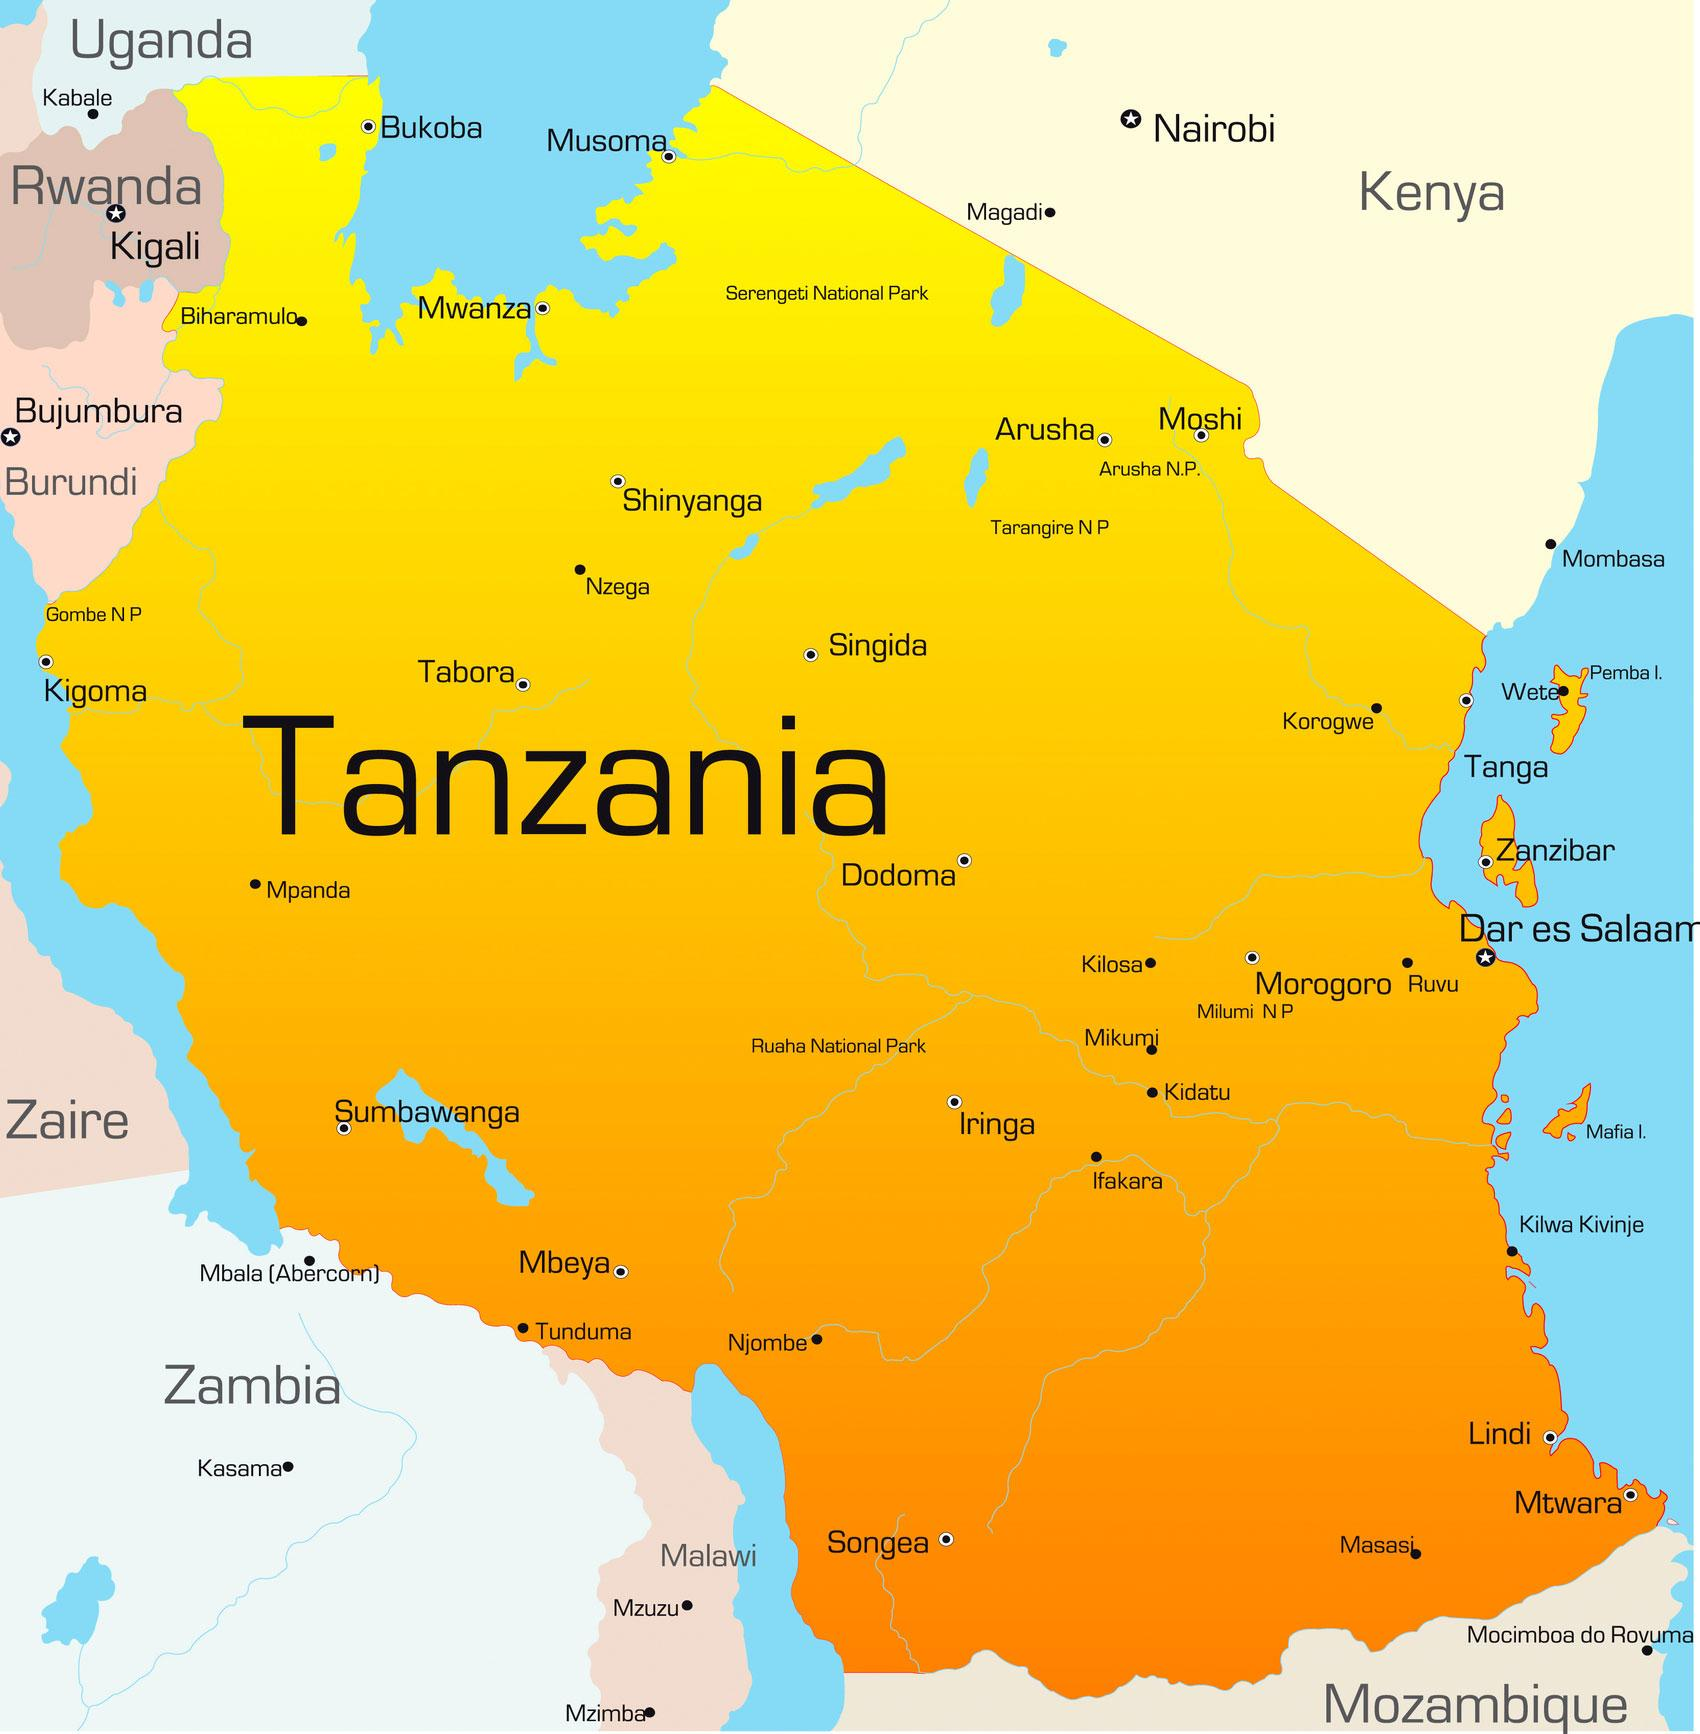

### TASK 2.0 BUSINESS UNDERSTANDNING


##### An NGO focused on locating wells that needs repair. The Tanzanian government is looking to find  patterns in non-functional wells to influence how new wells are built. As an employee of the NGO i have been tasked with presenting findings on how the Ministry of Water can identify wells that are non-functional or in need of repair, so that they can dispatch teams to fix them.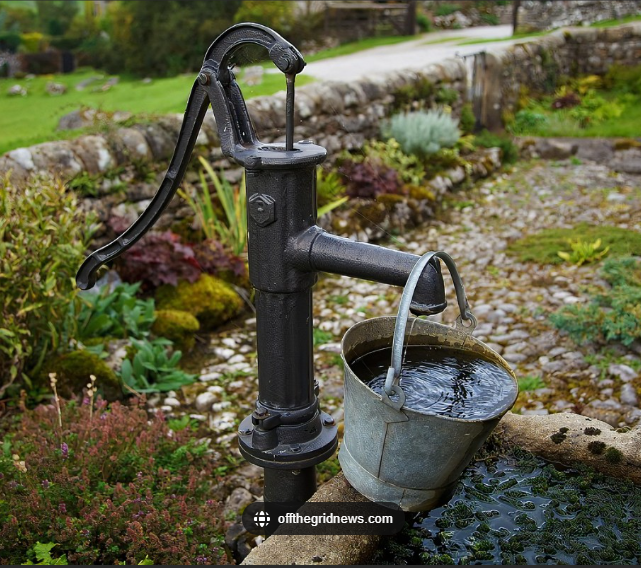

### TASK 3.0: DATA UNDERSTANDING

### TASK 4.0: DATA INSPECTION

In [1]:
#importing libraries and packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

In [2]:
training_set_labels = pd.read_csv("/content/training-set-labels.csv")
training_set_values = pd.read_csv("/content/training-set-values.csv")

In [3]:
training_set_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [4]:
training_set_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [5]:
df = pd.merge(training_set_values, training_set_labels, on='id')
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [6]:
# printing information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [7]:
#finding the sum of null values in each column
df.isna().sum()
# calculating column wise Null percentage
df.isna().sum()/len(df)*100

id                        0.000000
amount_tsh                0.000000
date_recorded             0.000000
funder                    6.119529
gps_height                0.000000
installer                 6.153199
longitude                 0.000000
latitude                  0.000000
wpt_name                  0.000000
num_private               0.000000
basin                     0.000000
subvillage                0.624579
region                    0.000000
region_code               0.000000
district_code             0.000000
lga                       0.000000
ward                      0.000000
population                0.000000
public_meeting            5.612795
recorded_by               0.000000
scheme_management         6.526936
scheme_name              47.417508
permit                    5.144781
construction_year         0.000000
extraction_type           0.000000
extraction_type_group     0.000000
extraction_type_class     0.000000
management                0.000000
management_group    

### TASK 5.0: DATA CLEANING

##### Analysing columns with missing values and finding the best option to deal with missing values

In [8]:
# display the first 5 rows of every feature in the dataset
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [9]:
#all columns with missing values display
df[['funder','installer','subvillage','public_meeting','scheme_management','scheme_name','permit']]

,funder,installer,subvillage,public_meeting,scheme_management,scheme_name,permit
0,Roman,Roman,Mnyusi B,True,VWC,Roman,False
1,Grumeti,GRUMETI,Nyamara,NaN,Other,NaN,True
2,Lottery Club,World vision,Majengo,True,VWC,Nyumba ya mungu pipe scheme,True
3,Unicef,UNICEF,Mahakamani,True,VWC,NaN,True
4,Action In A,Artisan,Kyanyamisa,True,NaN,NaN,True
...,...,...,...,...,...,...,...
59395,Germany Republi,CES,Kiduruni,True,Water Board,Losaa Kia water supply,True
59396,Cefa-njombe,Cefa,Igumbilo,True,VWC,Ikondo electrical water sch,True
59397,NaN,NaN,Madungulu,True,VWC,NaN,False
59398,Malec,Musa,Mwinyi,True,VWC,NaN,True


In [10]:
df[df['funder'].isna()]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
34,41583,0.0,2/23/2011,NaN,-41,NaN,39.812912,-7.889986,Msikitini Wa Ijumaa,0,...,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
43,19282,0.0,1/15/2013,NaN,1642,NaN,34.967789,-4.628921,Mvae Primary,0,...,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional
47,13620,0.0,7/27/2011,NaN,0,NaN,33.540607,-9.172905,Mahakamani,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
65,51072,0.0,2/9/2013,NaN,1415,NaN,34.621598,-5.173136,Nyambi,0,...,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional
71,17386,0.0,3/31/2011,NaN,0,NaN,34.462228,-8.575780,Kwa Manyusi Mlilo,0,...,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59357,46563,0.0,2/19/2013,NaN,1635,NaN,34.971841,-5.098362,Shabani,0,...,unknown,unknown,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
59366,55232,0.0,2/2/2013,NaN,1541,NaN,34.765729,-5.027725,Joshoni,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
59370,14796,200.0,1/29/2013,NaN,1154,NaN,30.058731,-4.902633,Village Office,0,...,unknown,unknown,unknown,unknown,unknown,other,unknown,other,other,functional
59376,34716,0.0,2/3/2013,NaN,1581,NaN,34.821039,-5.076258,Nasingo,0,...,unknown,unknown,dry,dry,shallow well,shallow well,groundwater,other,other,non functional


##### Since most funding organizations of the wells are also the installers of the wells I decided to replace the null values in both columns with column data from both columns. This will make both columns have same number of remaining missing values which i will have to replace with Not given. 

In [11]:
#filling null values in funder with data from installer
df['funder'].fillna(df['installer'], inplace=True)

In [12]:
#filling null values in installer with data from funder
df['installer'].fillna(df['funder'], inplace=True)

In [13]:
#check for null values in both columns
df[['funder','installer']].isna().sum()

funder       3582
installer    3582
dtype: int64

In [14]:
#filling the NaN values in the funder column with Not_given
df['funder'].fillna("Not_given",inplace =True)

In [15]:
#filling the NaN values in the installer column with Not_given
df['installer'].fillna("Not_given",inplace =True)

In [16]:
#check for null values
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

##### Checking for duplicate values in the data set to ensure that there are no rows that are duplicated. 

In [17]:
df.duplicated().sum()

0

##### There are no duplicates in the dataset.

I will drop scheme_name column since it is similar to scheme management and it also has null values of about 47% thus the need to drop it.

In [18]:
 df=df.drop (["scheme_name"], axis =1)
 df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


##### Since null values in subvillage make up only 0.6 % i prefer dropping the null row in subvillage .

In [21]:
#drop null rows in subvillage
df.dropna(subset=['subvillage'], inplace = True)

##### In permit and public meeting column I will replace null values with false since the column is a true or false column. Since the data in permit colum was not given using logic these rows will be replcaed with false.

In [22]:
#filling the NaN values in the permit and public meeting column with false.
df['permit'].fillna("False",inplace =True)
df['public_meeting'].fillna("False",inplace =True)

In [25]:
# check value counts in 'scheme_management'
df['scheme_management'].value_counts()

VWC                 36437
WUG                  5206
Water authority      3147
WUA                  2883
Water Board          2747
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [26]:
#filling the NaN values in the 'scheme_management'column with false.
df['scheme_management'].fillna("None",inplace =True)

##### since all null values in all columns have been dealt with the cell below confirms if the data has been cleaned.

In [27]:
#check for null values in the data frame.
df.isna().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
w

## TASK 6.0: EXPLORATORY DATA ANALYSIS